In [1]:
import numpy as np
from scipy.integrate import odeint
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lorenz(x, t, F):
    '''Partial derivatives for Lorenz-96 ODE.'''
    p = len(x)
    dxdt = np.zeros(p)
    for i in range(p):
        dxdt[i] = (x[(i+1) % p] - x[(i-2) % p]) * x[(i-1) % p] - x[i] + F

    return dxdt


def simulate_lorenz_96(p, T, F=10.0, delta_t=0.1, sd=0.1, burn_in=1000,
                       seed=0):
    if seed is not None:
        np.random.seed(seed)

    # Use scipy to solve ODE.
    x0 = np.random.normal(scale=0.01, size=p)
    t = np.linspace(0, (T + burn_in) * delta_t, T + burn_in)
    X = odeint(lorenz, x0, t, args=(F,))
    X += np.random.normal(scale=sd, size=(T + burn_in, p))

    # Set up Granger causality ground truth.
    GC = np.zeros((p, p), dtype=int)
    for i in range(p):
        GC[i, i] = 1
        GC[i, (i + 1) % p] = 1
        GC[i, (i - 1) % p] = 1
        GC[i, (i - 2) % p] = 1

    return X[burn_in:], GC

In [3]:
device = torch.device('cuda')

In [42]:
X_np, GC = simulate_lorenz_96(p=5, F=10, T=200)
X = torch.tensor(X_np[np.newaxis], dtype=torch.float32, device=device)

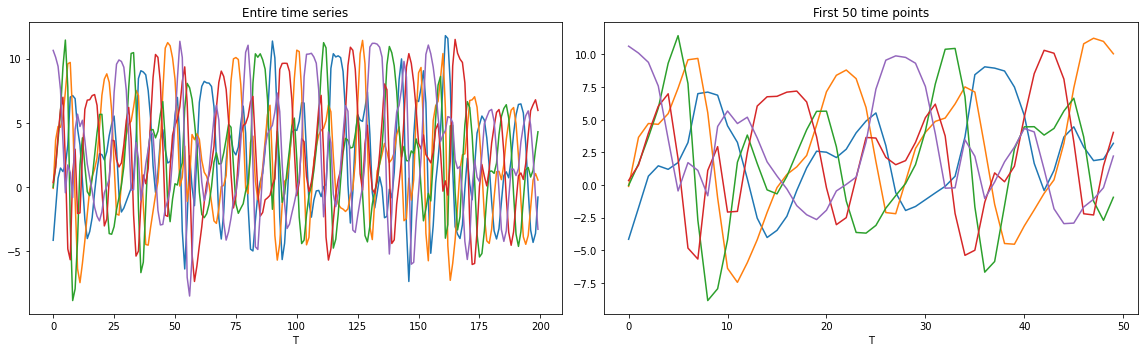

In [43]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(X_np)
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[1].plot(X_np[:50])
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd
df2 = pd.DataFrame(X_np)

In [45]:
df2.to_csv('./dataset/demo2_csv.csv', index = False)

In [39]:
df.to_csv('./dataset/demo_csv.csv', index = False)

In [46]:
missing_masks = np.where((1*(np.random.uniform(0, 1, [200, 5]) > 0.3)) > 0.3, 1, np.nan)
df_short2 = df2 * missing_masks

In [36]:
import numpy as np
import pandas as pd

def consecutive_zeros_length(column):
    max_length = 0
    current_length = 0

    for element in column:
        if element == 0:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 0

    return max_length


num_variables = 5

total_data_points = 200

missing_ratio = 0.2

seqlen = 5

data = {}
for i in range(num_variables):
    data[f'variable_{i+1}'] = np.random.rand(total_data_points)

# 누락값 생성
for i in range(num_variables):
    num_missing = int(np.round(total_data_points * missing_ratio / seqlen))
    missing_indices = np.random.choice(total_data_points - seqlen, num_missing, replace=False)

    for index in missing_indices:
        data[f'variable_{i+1}'][index:index + seqlen] = np.nan
# 데이터프레임 생성
df_missing_masksing = pd.DataFrame(data)

A = np.where(~np.isnan(df_missing_masksing.values), 1, np.nan)

B = np.where((1*(np.random.uniform(0, 1, [100, 5]) > 0.1)) > 0.1, 1, np.nan) * A

print(np.sum(np.where(~np.isnan(B), 1, 0))  / (100 * 5))
C = np.where(~np.isnan(B), 1, 0)
zero_lengths = [consecutive_zeros_length(column) for column in C.T]

# 결과 출력
print(zero_lengths)

0.72
[6, 6, 6, 8, 8]


In [37]:
df_long = df * B

In [38]:
df_long.to_csv('./dataset/demo_long.csv', index = False)

In [41]:
df_short.to_csv('./dataset/demo_short.csv', index = False)

In [47]:
df_short2.to_csv('./dataset/demo_short2.csv', index = False)